In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from numpy import linalg as LA
%matplotlib inline

In [2]:
matplotlib.rcParams['figure.figsize'] = [20, 10]

In [39]:
def connect(H):
    n, m = H.shape
    H[0, m - 1] = H[n - 1, 0] = -1
    return H

In [40]:
def spectrum(e):
    plt.subplot(131)
    plt.plot(e)
    plt.subplot(132)
    plt.plot(e[e < 0], "+")
    plt.subplot(133)
    plt.plot(e[-20:], "+")

In [41]:
def solve(H):
    e, v = LA.eig(H)
    v = v[:, np.argsort(e)]
    e = e[np.argsort(e)]
    return e, v

In [42]:
def density(o):
    """ Return probability density """
    return abs(o)**2

In [43]:
def collect_density(v, n, m = 0):
    return (abs(v[:, m:n])**2).sum(axis = 1)

In [45]:
def density_slices(r, v, d = 10, n = 5):
    for i in range(n):
        plt.plot(r, collect_density(v, d * (i + 1), d * i))

In [47]:
def make_H(m, dx, periodic = False):
    H = np.zeros( (m, m) )
    for i in range(m):
        H[i, i] = 2
        H[i, (i - 1) % m] = H[i, (i + 1) % m] = -1
        
    if not periodic: 
        H[0, m - 1] = H[m - 1, 0] = 0 
    
    units = 0.5 # Ha * A² = h_bar²/2m_e
    return H * (units / dx**2)

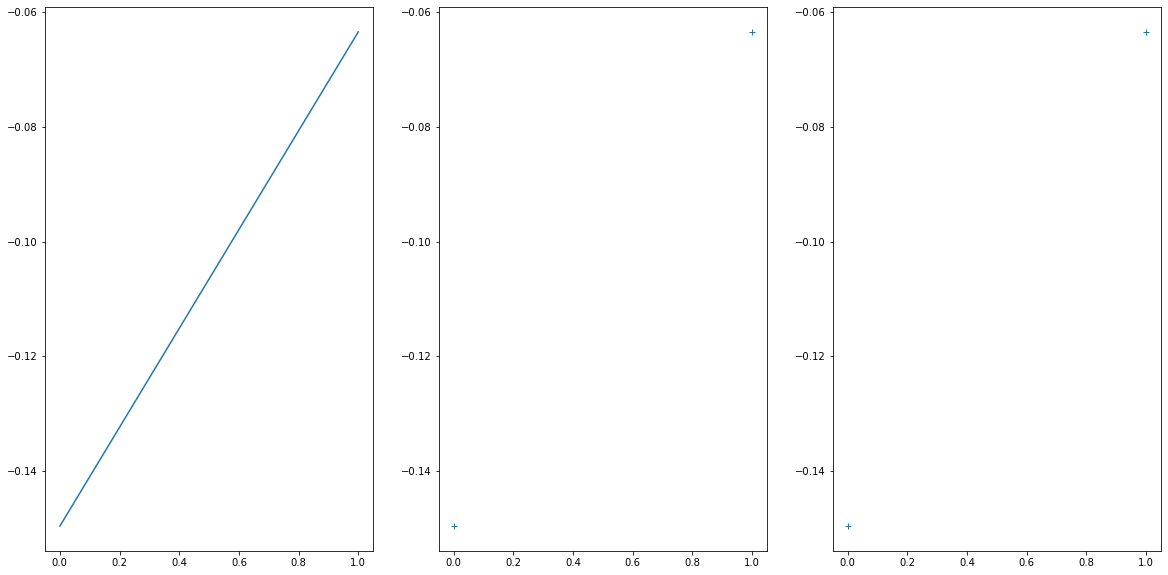

In [48]:
spectrum(e)

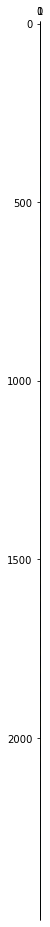

In [49]:
plt.matshow(v[:, np.argsort(e)])

In [50]:
def pev(r, v, n, eps = 1e-2):

    p = np.abs(v[:, n])**2
    plt.plot(r, p * max(abs(v[:, n])) / max(p), '-')
    
    plt.plot(r, v[:, n], "+")
    s = r[p > eps * p.mean()]
    plt.xlim(s[0], s[-1])
    

# $\frac{1}{r}$ Potential

In [51]:
def V(r, f = 1e-1):
    units = 1 # eV A = e²/(4πe_0) / r_0
    return -units / (f + abs(r))

def add_cation(H, r, Z, k):
    return H + Z * np.diag(V(r - k))

In [80]:
m = 40
r = np.linspace(-3, 3, m)

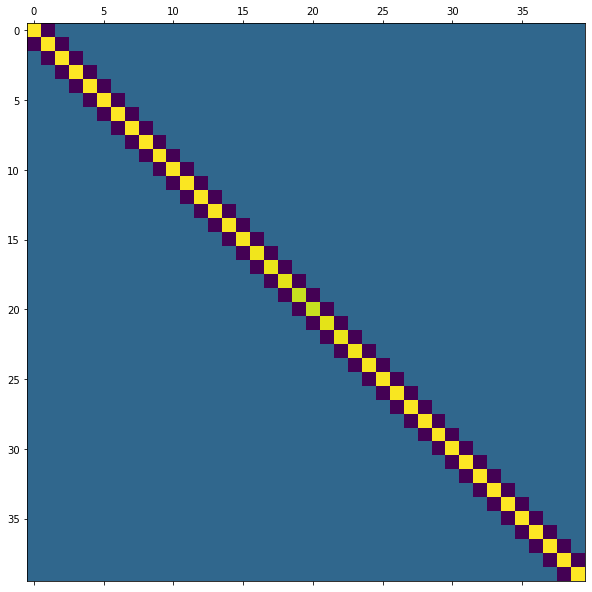

In [81]:
k = 0
Hk = add_cation(make_H(m, r[1] - r[0], periodic = False), r, 1, k)
plt.matshow(Hk)

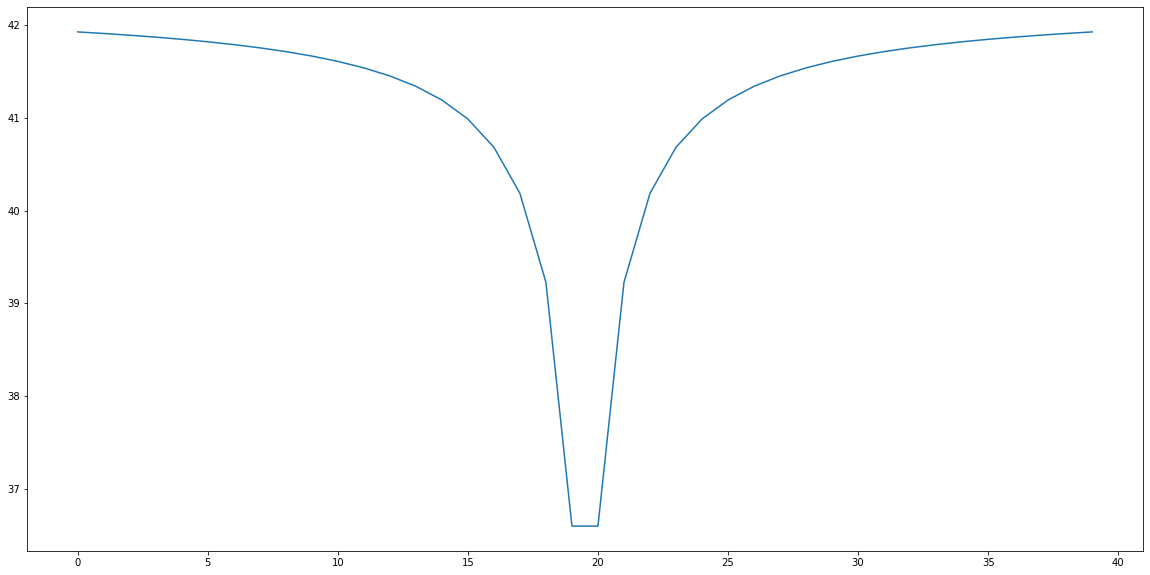

In [82]:
plt.plot(np.diag(Hk))

In [83]:
ek, vk = solve(Hk)

In [84]:
ek

array([-2.55031381, -0.290404  ,  0.13775849,  1.10689394,  1.98392989,
        3.45984475,  4.82720345,  6.7230208 ,  8.54466183, 10.80842219,
       13.03358895, 15.614503  , 18.18400029, 21.02525602, 23.87366891,
       26.91165275, 29.96888378, 33.13408433, 36.32690314, 39.54531235,
       42.79906866, 45.99369207, 49.23422883, 52.32650221, 55.48230832,
       58.39322036, 61.39792858, 64.04854525, 66.84403411, 69.15489927,
       71.69555898, 73.58429547, 75.84337332, 77.22230758, 79.19937492,
       79.99728522, 81.70574126, 81.98691911, 83.35919026, 83.39483947])

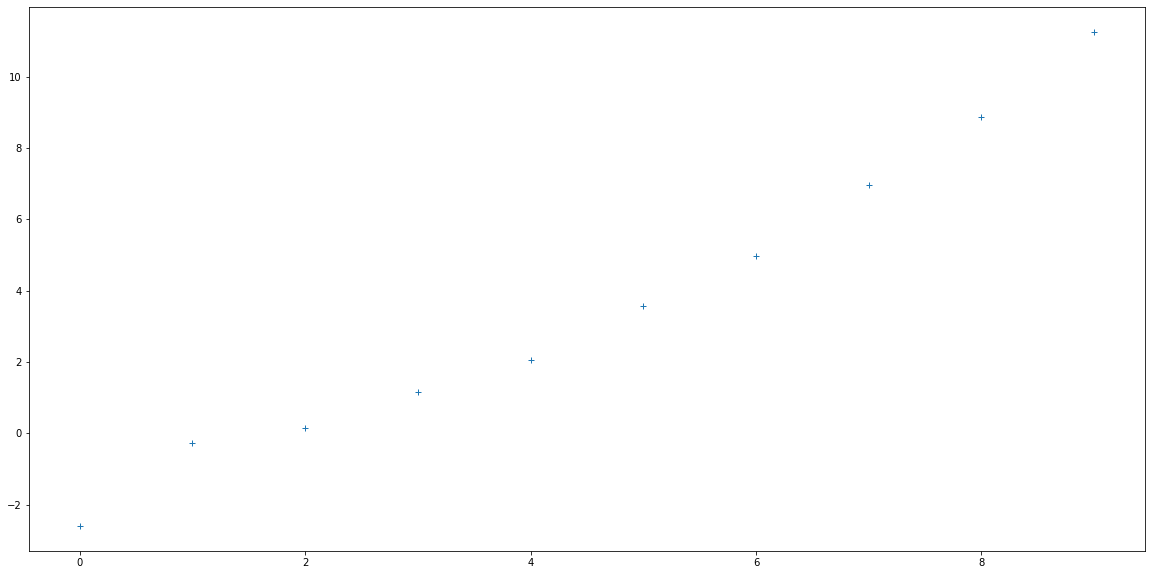

In [79]:
plt.plot(ek[:10], "+")

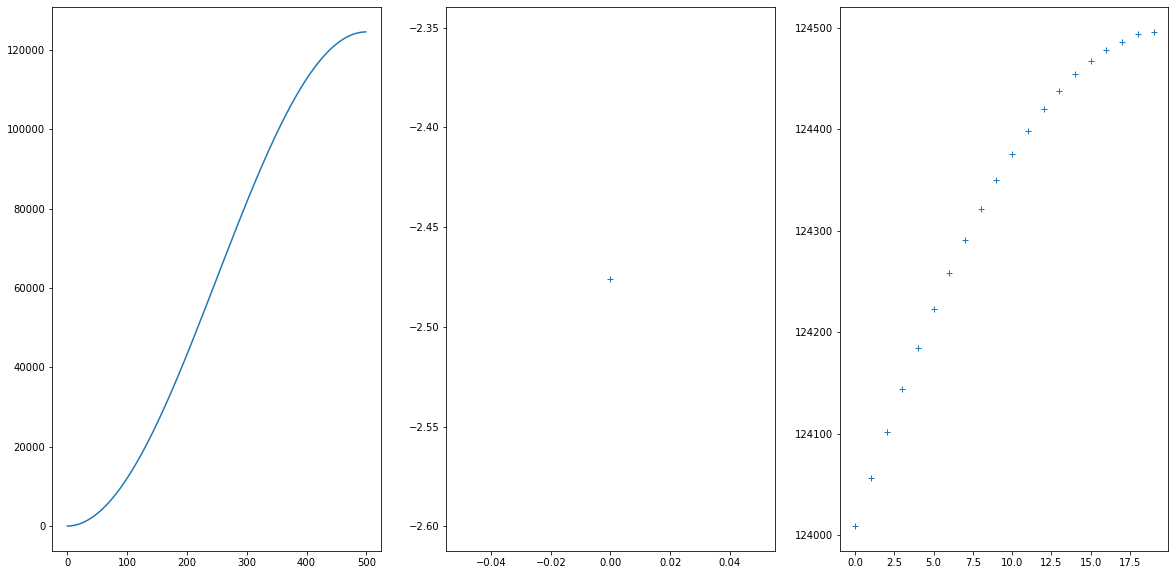

In [68]:
spectrum(ek)

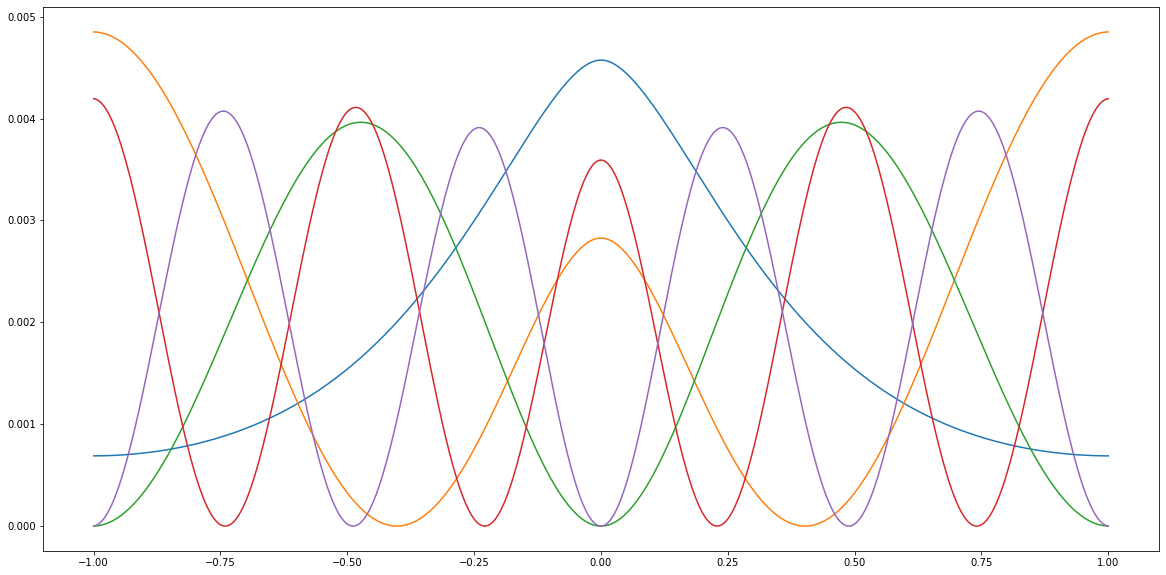

In [64]:
plt.plot(r, vk[:, 0:5]**2)

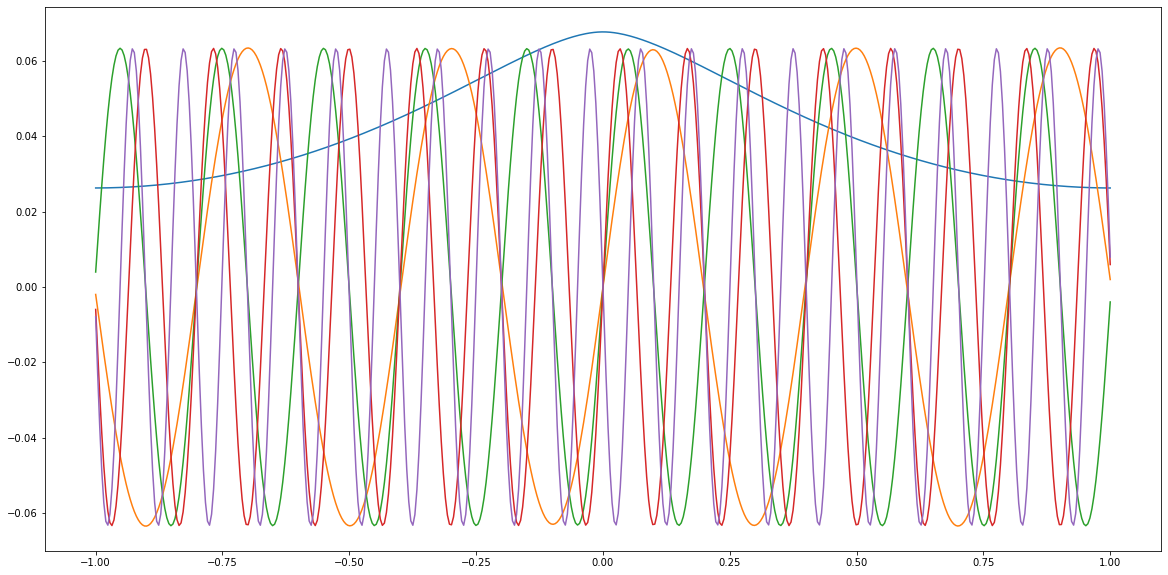

In [60]:
plt.plot(r, vk[:, :50:10])

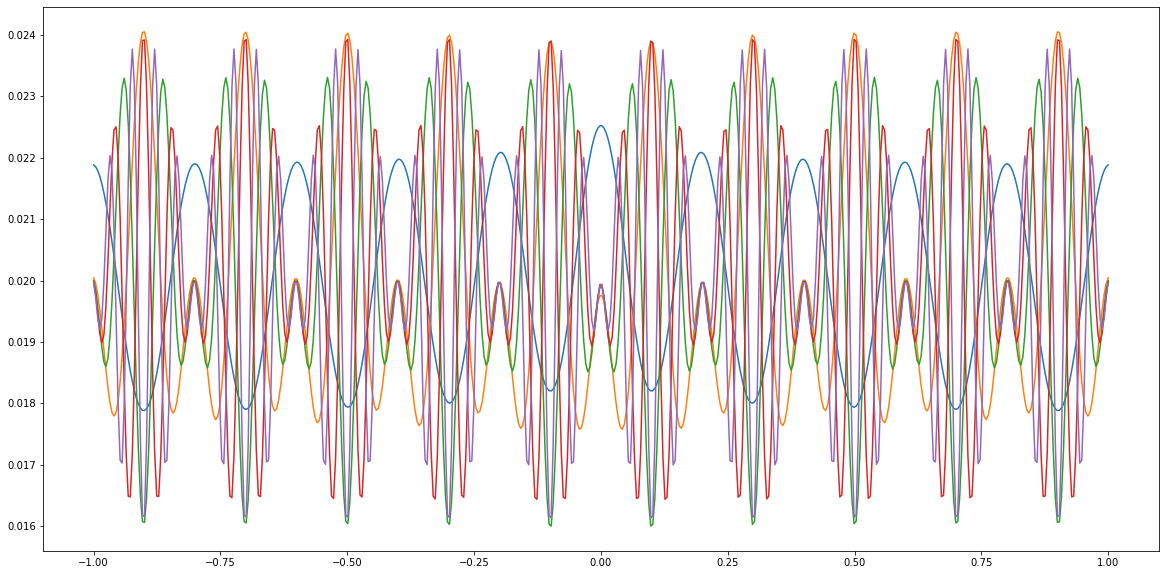

In [58]:
D = 10
for i in range(5):
    plt.plot(r, collect_density(vk, D * (i + 1), D * i))

# Dihydrogen Cation

In [21]:
def add_cations(H, r, e, ks):
    for k in ks:
        H = add_cation(H, r, e, k)
    return H

In [25]:
k1 = .7
k2 = -.75
Hkk = add_cations(make_H(m, r[1]-r[0], periodic = True), r, 1, [k1, k2])

In [26]:
ekk, vkk = solve(Hkk)

In [27]:
spectrum(ekk)

<ipython-input-4-e63869a6b370>:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(131)
<ipython-input-4-e63869a6b370>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(132)
<ipython-input-4-e63869a6b370>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  M

In [28]:
density_slices(r, vkk, 12, 4)

## Compare Orbitals & Density in Single & Double Cations

Single site densities from the double cation solution agree extremely well with the single cation solutions.

In [29]:
pev(r, vkk, 0, eps = 1e-3)
pev(r + k1, vk, 0, eps = 1e-3)
plt.title('First State')

Text(0.5, 1.0, 'First State')

In [30]:
pev(r, vkk, 3, eps = 1e-3)
pev(r + k1, vk, 1, eps = 1e-3)
plt.title('Second State')

Text(0.5, 1.0, 'Second State')

In [31]:
pev(r, vkk, 4, eps = 1e-3)
pev(r + k1, vk, 2, eps = 1e-3)
plt.title('Third State')

Text(0.5, 1.0, 'Third State')

In [32]:
density_slices(r, vkk, 10, 3)
#plt.figure()
density_slices(r + k1, vk, 5, 3)

## Energy over Distance Experiments

In [15]:
L = []
L10 = []
p0 = []
ds = np.linspace(.01, 1, 25)
for d in ds:
    HH = add_cations(H, r, 1, [-d/2, d/2])
    e, v = solve(HH)
    L.append(e[0])
    L10.append(e[:2].sum())
    p0.append(v[:, 0])

NameError: name 'r' is not defined

In [34]:
plt.plot(ds[:17], L10[:17], "o")
plt.plot(ds[17:], L10[17:], "+")

In [35]:
i = 16
plt.plot(r, p0[i])
p = abs(p0[i])
plt.plot(r, p)
s = r[p > 1e-4 * p.mean()]
plt.xlim(s[0], s[-1])
plt.vlines([ds[i]/2, -ds[i]/2], -.5, .5)
plt.title(ds[i])

Text(0.5, 1.0, '0.67')

In [36]:
r[1]-r[0]

0.004008016032064132

In [37]:
plt.plot(ek)
plt.plot(ekk)

# Discussion
+ visualize wave functions of single cation and introduce bound states
+ (discuss symmetric solutions)
+ add second cation:
    + hypothesize over what solutions to expect
    + calculate and compare single cation eigenfunctions to every other double cation eigenfunctions
    + introduce frozen-core
+ extra credit: https://en.wikipedia.org/wiki/Particle_in_a_spherically_symmetric_potential#Relationship_with_1-D_Schr%C3%B6dinger_equation

# Radially Symmetric Potentials

In [38]:
def Vr(r, l = 0, f = 1e-4):
    return V(r, f = f) + l * (l + 1) / (f + r**2)

In [39]:
rr = np.linspace(0, 5, m)
Hr = H + 0.05 * np.diag(Vr(rr, l = 2, f = 1e-2))
er, vr = solve(Hr)

In [40]:
spectrum(er)

<ipython-input-4-e63869a6b370>:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(131)
<ipython-input-4-e63869a6b370>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(132)
<ipython-input-4-e63869a6b370>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  M

In [59]:
pev(rr, vr, 0)

NameError: name 'rr' is not defined